We can start the project by importing the required libraries and read the data

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
df=pd.read_csv('insurance.csv')

In [ ]:
print(df.describe())
print(df.isna().sum())
df

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Looking at the data above we can see there are more than 1338 rows and 7 column with no NA

Let's examine possible categorical outcomes for the region and smoker features.

In [ ]:
print (df.region.unique())
print (df.smoker.unique())

['southwest' 'southeast' 'northwest' 'northeast']
['yes' 'no']


In order to better analyze the data, I am going to hot end code the categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['smoker'] = le.fit_transform(df['smoker'])

# Exploratory Analysis

I would like to know if my data is skewed and visualize the data distribution.

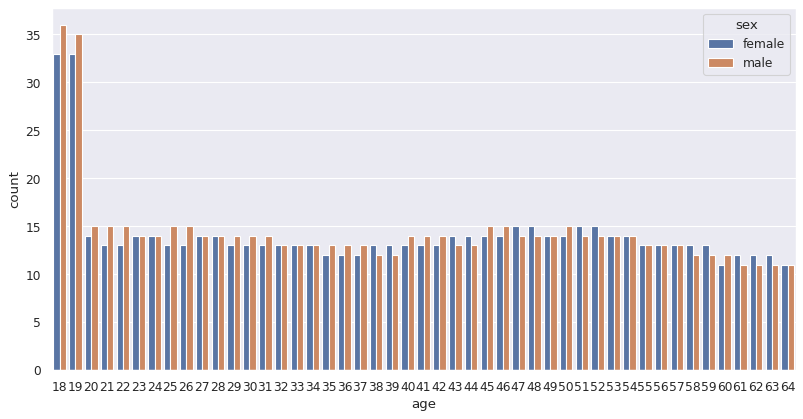

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)
sns.countplot(x=df['age'],hue=df['sex'])

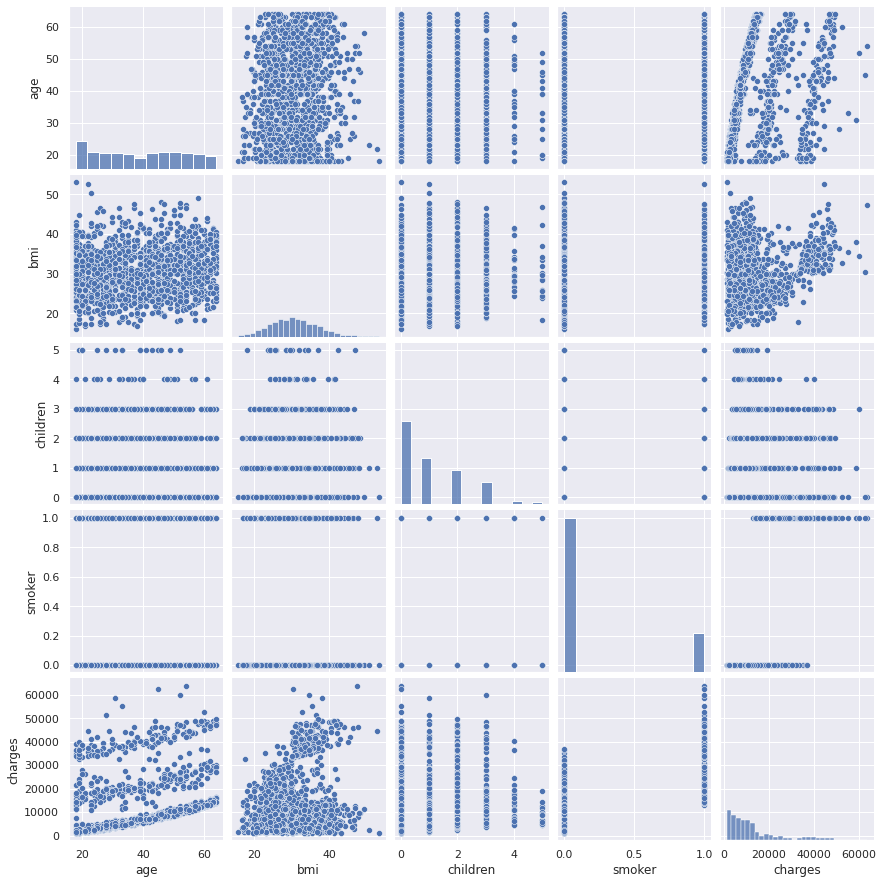

In [ ]:
sns.pairplot(df)

Few insights from the pair plot:
If the patient is a smoker, its likely the charge would be higher,
The charges are primarily in the range of 0 to 20,000 (I need to further investigate with normalization). 
 I need to investigate the BMI and charges further as the current graph does not provide enough insight.

Lets check of the charges distribution

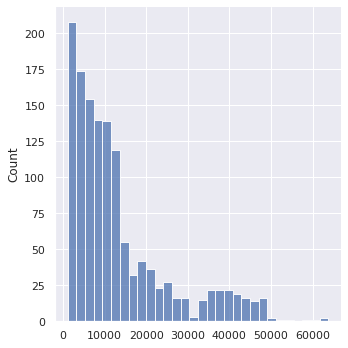

In [ ]:
charges= df['charges'].values
sns.displot(charges)

As we can see, the data for charges is not normalized. The logarithm  of the charges has been taken to demonstrate the normal distribution for this variable

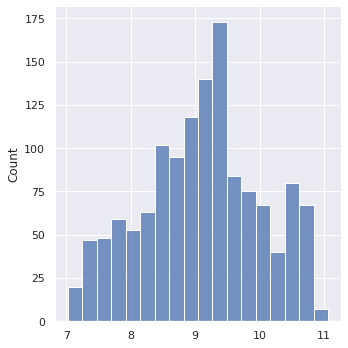

In [ ]:
charges_norm=np.log(charges)
sns.displot(charges_norm)

BMI


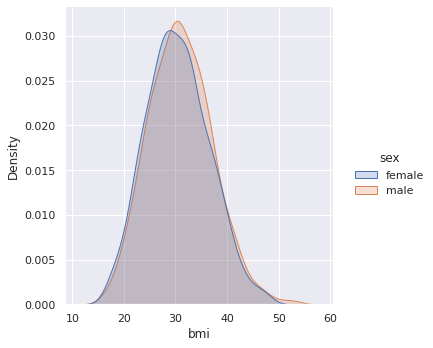

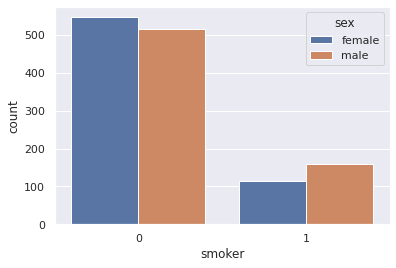

In [ ]:
sns.displot(df, x='bmi', hue='sex', kind="kde", fill=True)
plt.show()

sns.countplot(data=df, x='smoker', hue='sex')
plt.show()


Is there a correlation between body mass and age?
In order to better analyze the importance of age and how age impacts other criteria such as BMI, I create an age group range

In [ ]:
print('The max age is :',df['age'].max())
print('The min age is :',df['age'].min())

age_group_interval =10
df['age_group']=df['age']/age_group_interval
df.loc[df['age_group']<= 2.8, 'age_group_range'] = '18-28'
df.loc[(df['age_group']> 2.8) & (df['age_group']<= 3.8), 'age_group_range'] = '29-38' 
df.loc[(df['age_group']> 3.8) & (df['age_group']<= 4.8), 'age_group_range'] = '30-48' 
df.loc[(df['age_group']> 4.8) & (df['age_group']<= 5.8), 'age_group_range'] = '49-58' 
df.loc[(df['age_group']> 5.8) & (df['age_group']<= 6.8), 'age_group_range'] = '50-68' 


df=df.drop('age_group',axis=1)

The max age is : 64
The min age is : 18


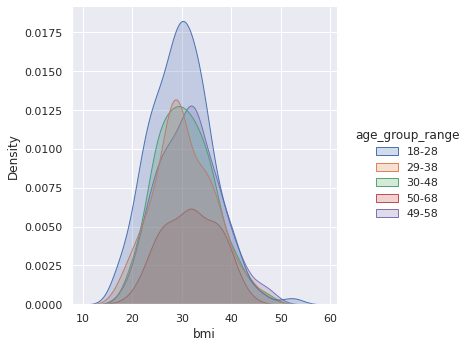

In [ ]:
sns.displot(df, x='bmi', hue='age_group_range', kind="kde", fill=True)
plt.show()

The above demonstrate that the mean of the BMI regardless of the age group is almost same, however as the age goes the variation in BMI becomes more

Let's analyse the smoker population

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


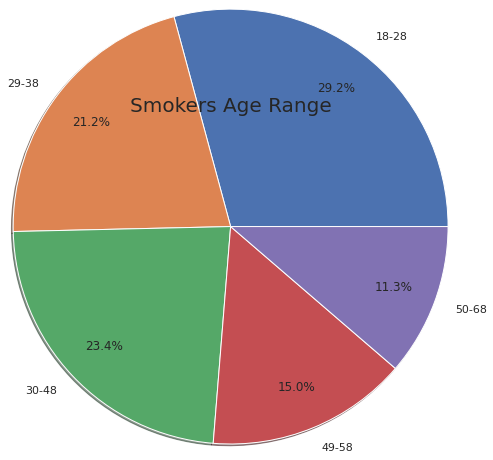

In [ ]:
data=df[['smoker','age_group_range']].loc[df['smoker']==1].groupby('age_group_range').count()
data

labels = data.index

plt.pie(x=data, autopct="%.1f%%",labels=labels,pctdistance=0.8,shadow=True,radius=2.5)
plt.title('Smokers Age Range', fontsize=20);


Now let's analyse if the smoker population pays higher bill with age range consideration

from above we can see the majority of the smoker population are in the age range of 18-28

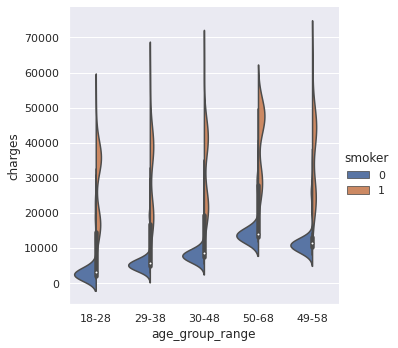

In [ ]:

data=df[['age_group_range','charges','smoker']]



sns.catplot(data=data, kind="violin", x='age_group_range', y='charges', hue='smoker', split=True)

We can see the medical cost for the smoker people is higher in every age group.

Is there any diffence between male and female in each age group when it comes to the medical bill?

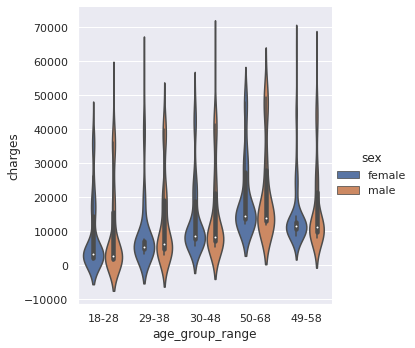

In [ ]:
data=df[['age_group_range','charges','sex']]

sns.catplot(data=data, kind="violin", x="age_group_range", y="charges", hue="sex", split=False)


The answer is no

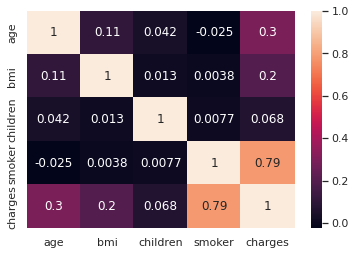

In [ ]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Let's start the MI with different regression model

Data Processing

In [ ]:
# Dropping the feature that was added for analysis
df=df.drop('age_group_range',axis=1)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [ ]:
# Creating the array for machine learning
X = df.iloc[:, :6].values
y = df.iloc[:, -1].values

In [ ]:
# There are categorical input in our data set, including sex and region.
# Performing onehotencoder operation on column 1 and 5

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
#testing onehoteencoder
print(X[0])
print(X[1])

[1.0 0.0 0.0 0.0 0.0 1.0 19 27.9 0 1]
[0.0 1.0 0.0 0.0 1.0 0.0 18 33.77 1 0]


In [ ]:
#splitting the trainig set and test set using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Multiple Linear Regression

In [ ]:
#fitting the multiple linear regression
rom sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#creating a prediction matrix using test set
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4383.68  1646.43]
 [12885.04 11353.23]
 [12589.22  8798.59]
 [13286.23 10381.48]
 [  544.73  2103.08]
 [32117.58 38746.36]
 [12919.04  9304.7 ]
 [12318.62 11658.12]
 [ 3784.29  3070.81]
 [29468.46 19539.24]
 [11002.81 12629.9 ]
 [17539.69 11538.42]
 [ 8681.35  6338.08]
 [ 8349.04  7050.64]
 [ 3130.13  1137.47]
 [10445.84  8968.33]
 [ 3863.74 21984.47]
 [ 6944.63  6414.18]
 [15009.63 28287.9 ]
 [14441.6  13462.52]
 [12543.66  9722.77]
 [32958.73 40932.43]
 [ 9072.64  8026.67]
 [ 8986.86  8444.47]
 [ 3022.86  2203.47]
 [ 8164.97  6664.69]
 [ 9556.08  8606.22]
 [10743.2   8283.68]
 [ 7694.02  5375.04]
 [ 4373.44  3645.09]
 [14140.94 11674.13]
 [ 5811.79 11737.85]
 [34631.91 24873.38]
 [27009.11 33750.29]
 [33348.14 24180.93]
 [ 9532.97  9863.47]
 [30421.65 36837.47]
 [26648.91 17942.11]
 [15157.78 11856.41]
 [33895.76 39725.52]
 [ 6303.39  4349.46]
 [14059.15 11743.93]
 [10713.45 19749.38]
 [15089.36 12347.17]
 [ 4187.95  4931.65]
 [13106.43 30260.  ]
 [ 4336.2  27724.29]
 [28607.06 34

In [ ]:
# evaluating the model performance using R^2
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7623311844057112

The multiple linear regression R^2 score was not great, lets try support ventor algorithim

SVR

In [ ]:
#splitting the training and test set (this was not really required)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
# Feature Scaling is required for SVM model, 
# reshaping the y_tain to the acceptable format for feature scaling 
y_train= y.reshape(1338,1)

In [ ]:
# performing feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [ ]:
# fitting the model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# prediction
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 3129.34  1646.43]
 [12550.72 11353.23]
 [10029.55  8798.59]
 [11733.68 10381.48]
 [ 2244.74  2103.08]
 [34623.96 38746.36]
 [10264.74  9304.7 ]
 [12680.98 11658.12]
 [ 3423.64  3070.81]
 [22037.8  19539.24]
 [13646.28 12629.9 ]
 [12936.61 11538.42]
 [ 7154.25  6338.08]
 [ 8062.58  7050.64]
 [ 2351.45  1137.47]
 [ 9477.38  8968.33]
 [ 4463.27 21984.47]
 [ 7414.61  6414.18]
 [13801.03 28287.9 ]
 [14490.63 13462.52]
 [10944.11  9722.77]
 [36415.97 40932.43]
 [ 9051.2   8026.67]
 [ 9653.07  8444.47]
 [ 3421.06  2203.47]
 [ 7291.59  6664.69]
 [ 9590.02  8606.22]
 [ 9453.7   8283.68]
 [ 6235.71  5375.04]
 [ 3924.27  3645.09]
 [12855.03 11674.13]
 [ 5040.34 11737.85]
 [22325.01 24873.38]
 [24270.64 33750.29]
 [23522.65 24180.93]
 [11124.81  9863.47]
 [38809.77 36837.47]
 [16905.76 17942.11]
 [12979.76 11856.41]
 [35316.53 39725.52]
 [ 4784.66  4349.46]
 [12892.99 11743.93]
 [11886.98 19749.38]
 [13289.9  12347.17]
 [ 5984.33  4931.65]
 [13596.36 30260.  ]
 [ 2999.98 27724.29]
 [28949.75 34

In [ ]:
# evaluating the model
r2_score(y_test, y_pred)

0.8576258777612062

Its a better score, but now lets try with Random Forest

Random Forest

In [ ]:
# re-creatign array
X = df.iloc[:, :6].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
X_train[1]

array([0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 53, 21.4, 1, 0], dtype=object)

In [ ]:
# fitting the model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators =70, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# prediction
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1908.84  1646.43]
 [11669.4  11353.23]
 [ 9098.64  8798.59]
 [10610.9  10381.48]
 [ 2135.65  2103.08]
 [38894.89 38746.36]
 [ 9677.89  9304.7 ]
 [11642.53 11658.12]
 [ 2994.28  3070.81]
 [19651.01 19539.24]
 [14375.2  12629.9 ]
 [11956.48 11538.42]
 [ 9116.85  6338.08]
 [ 7040.67  7050.64]
 [ 1587.89  1137.47]
 [ 9407.12  8968.33]
 [14853.59 21984.47]
 [ 6550.67  6414.18]
 [24597.78 28287.9 ]
 [13500.5  13462.52]
 [11711.21  9722.77]
 [41061.55 40932.43]
 [ 9698.11  8026.67]
 [ 8557.22  8444.47]
 [10589.28  2203.47]
 [ 6634.56  6664.69]
 [10373.55  8606.22]
 [ 8808.89  8283.68]
 [ 5871.44  5375.04]
 [ 3645.36  3645.09]
 [11971.93 11674.13]
 [10052.   11737.85]
 [24919.45 24873.38]
 [34134.22 33750.29]
 [25082.28 24180.93]
 [10467.04  9863.47]
 [37328.62 36837.47]
 [17673.69 17942.11]
 [12491.8  11856.41]
 [40962.38 39725.52]
 [ 5472.58  4349.46]
 [11740.45 11743.93]
 [16715.53 19749.38]
 [16906.14 12347.17]
 [ 4846.23  4931.65]
 [25017.41 30260.  ]
 [16601.44 27724.29]
 [35477.51 34

In [ ]:
# evaluating
r2_score(y_test, y_pred)

0.9777613303259217

The random forest model is the most accurate algorithim, with ~98% accuracy